# Ortogonal Learning

In [1]:
library(hdm)

set.seed(123)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D= X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

Warning message:
"package 'hdm' was built under R version 3.6.3"

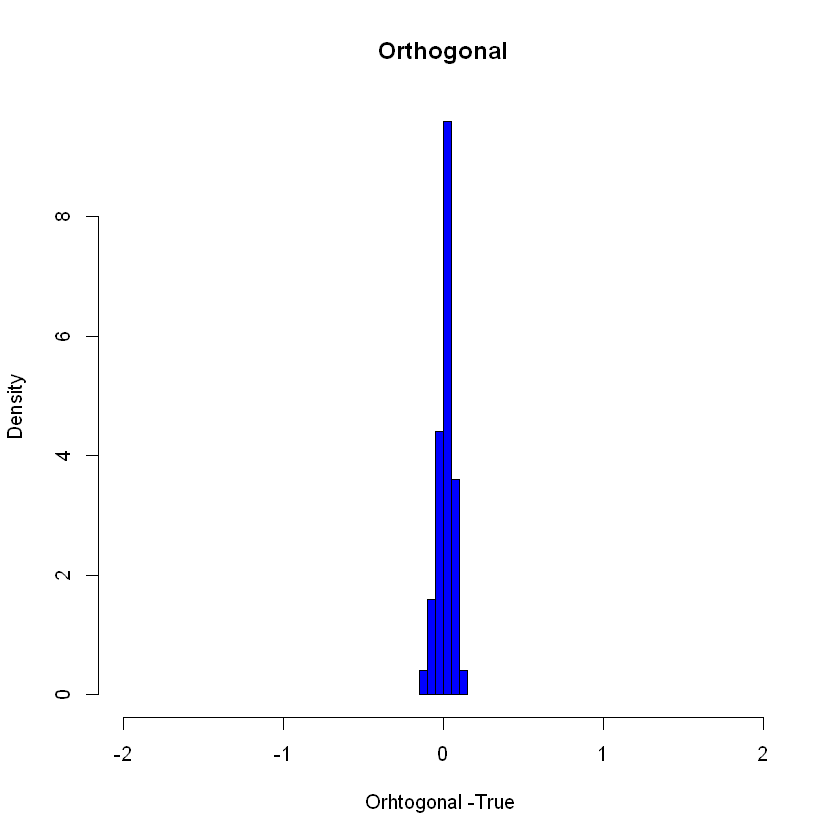

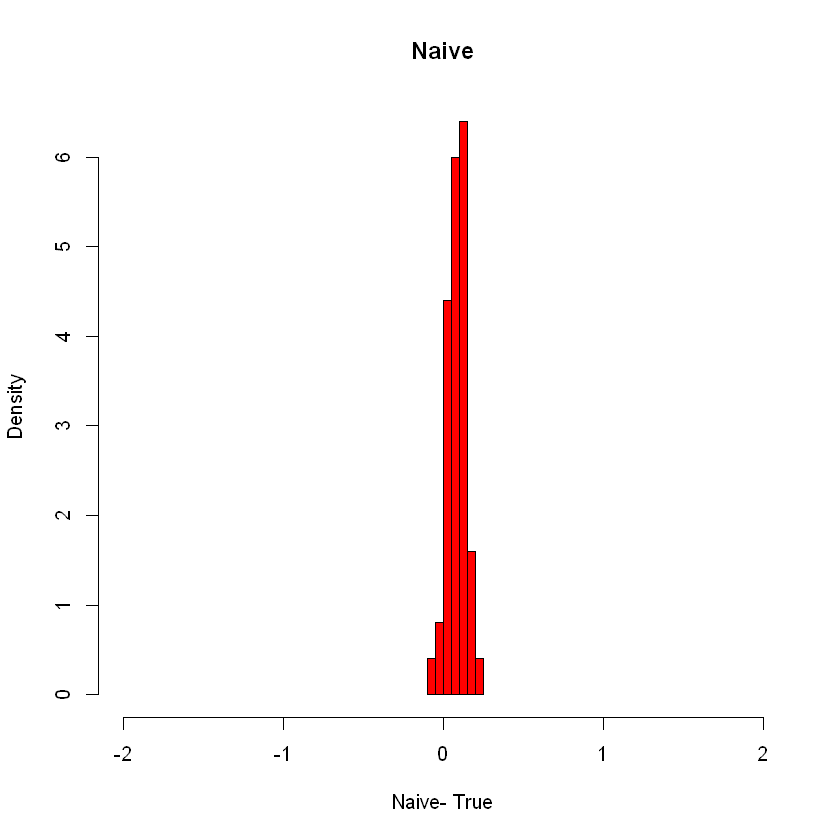

In [10]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [6]:
set.seed(1234)
B= 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D= X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}   

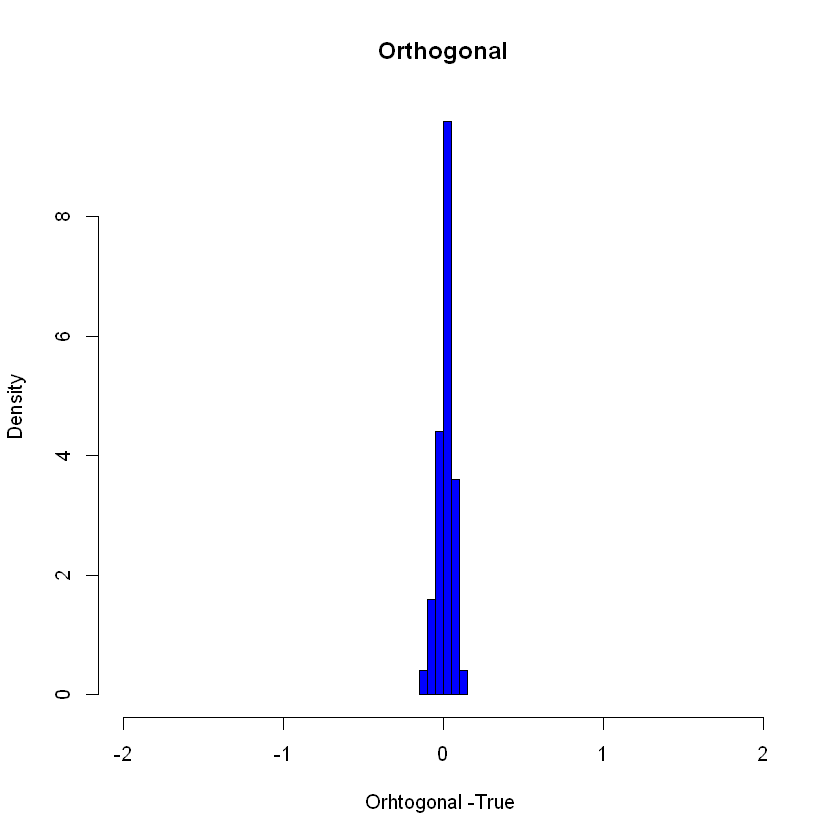

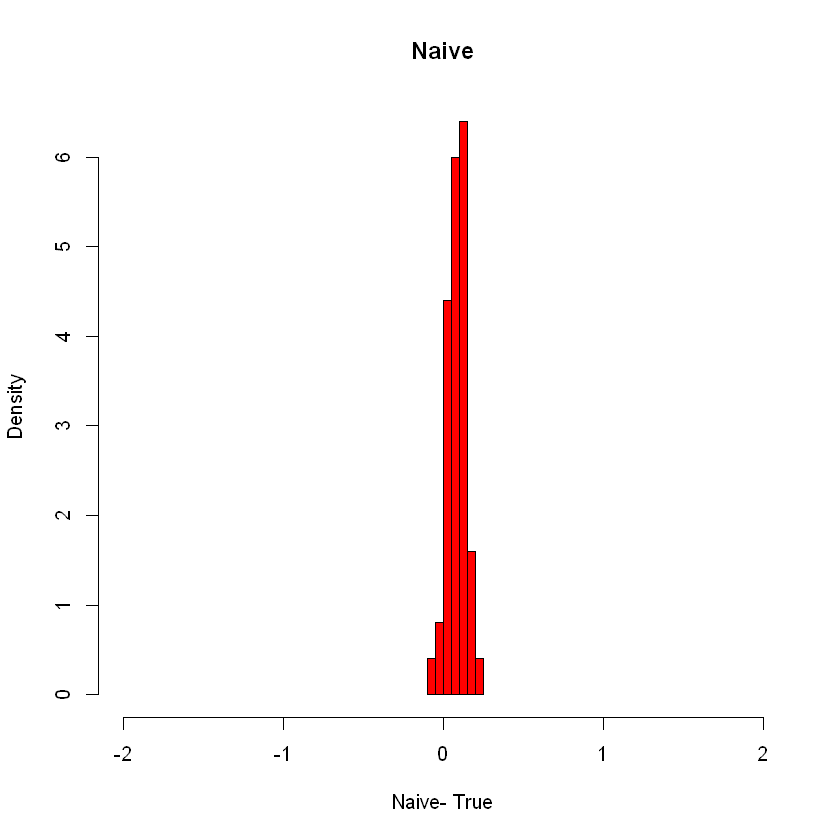

In [11]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

In [8]:
set.seed(12345)
B= 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D= X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

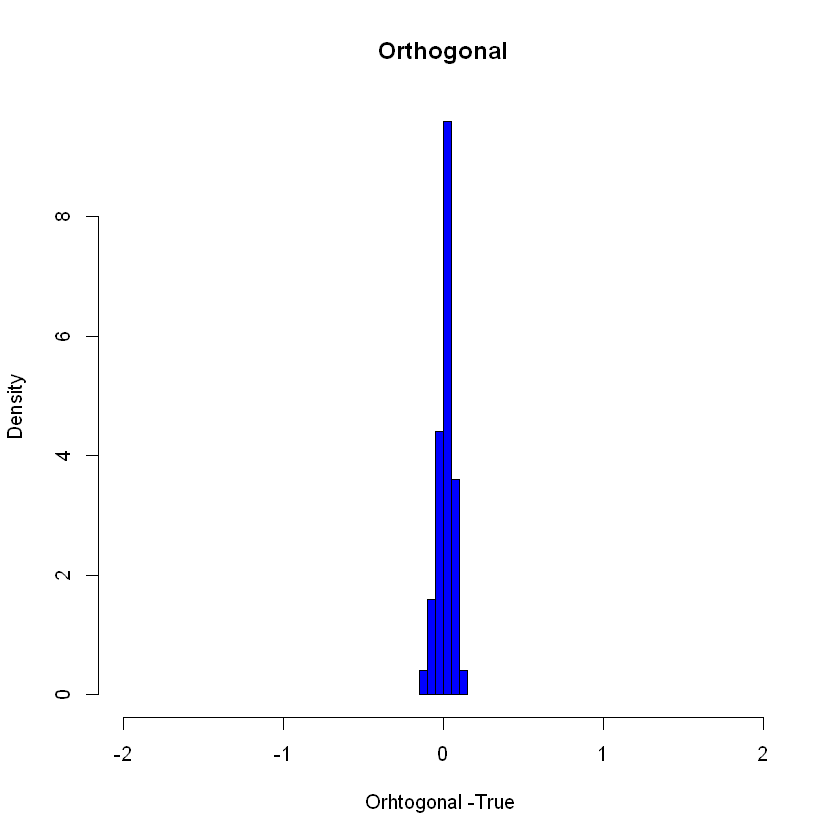

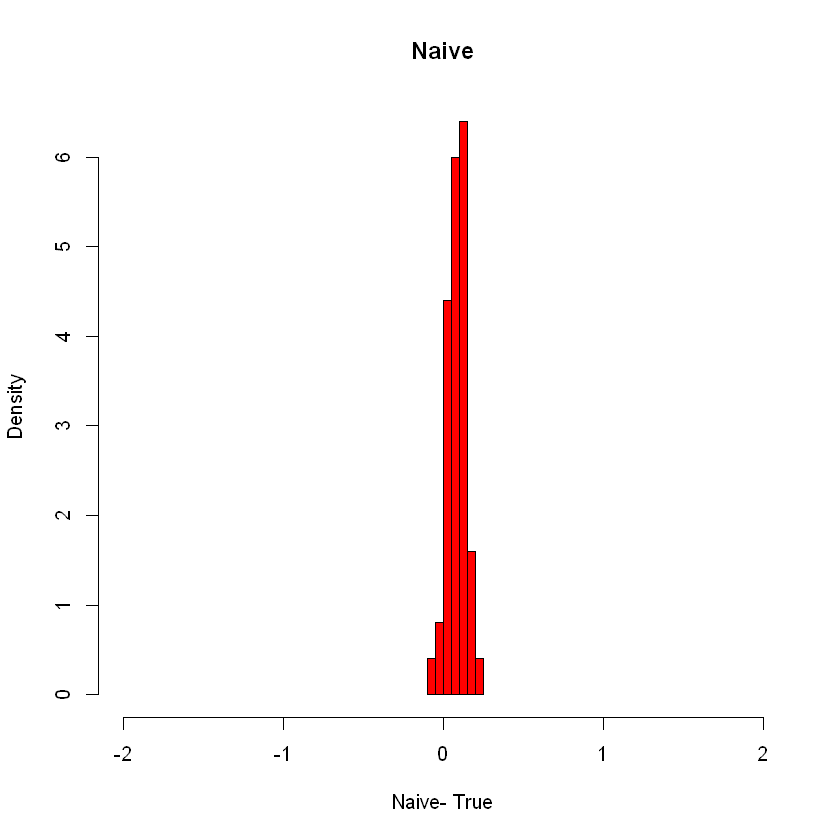

In [12]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [ ]:
# It can be seen that the data of the orthogonal matrix tend more to the center which is equal to 0. On the other hand, 
# the Naive data is a little more dispersed. The data of both matrices should be centered on zero, 
# because by subtracting 5 from all the data we achieve that they behave like a standardized normal (mean = 0).

# Since Orthogonal contains the estimates of the D variables through a Partialing out, 
# the effect of non-explanatory variables is eliminated, which allows the data to present a lower variance than the Naive data.

# Double Lasso - Testing the Convergence Hypothesis

## Double Lasso Approach

The Double Lasso Approach is used to select the variables to be included in the analyses in a way that avoids inflated type I errors, with the objective of identifying the covariates to be included in two steps, finding those that predict the dependent variable and those that predict the independent variable. The second step is important, because the exclusion of a covariate that is a simple predictor of the dependent variable may still be a strong predictor of the independent variable and may create an important omitted variable bias. This second step also serves as a test of randomization in the experimental data. Necessary to remember that the variables selected in either step are included in the regression of interest.

The penalty term causes the lasso regression to reduce the estimated coefficients of the estimated regression toward zero and the coefficients of some variables to be exactly zero, both of which help reduce overfitting. The lasso, by setting some coefficients to zero, is performing variable selection, so, these shrinkage methods allow using Lasso regression even when the number of observations is small relative to the number of predictors.

Compared to the lasso method, it is better to use the "double lasso" variable selection procedure. This is because the non-zero coefficients estimated by the lasso are often underestimated, and may be erroneously excluding variables with non-zero coefficients, particularly those with moderate effects. Consequently, a regularization bias occurs that negatively affects estimation and inference given the omission of covariates with moderate but non-zero coefficients having an omitted variable bias when these covariates are relevant predictors of the focal variable.

This notebook contains an example for teaching.

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [2]:
library(hdm)
library(xtable)

Warning message:
"package 'hdm' was built under R version 3.6.3"

In [3]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "C:/Users/MSI-NB/Documents/GitHub/14.38_Causal_ML/data/GrowthData.RData")

Warning message in gzfile(file, "wb"):
"cannot open compressed file 'C:/Users/MSI-NB/Documents/GitHub/14.38_Causal_ML/data/GrowthData.RData', probable reason 'No such file or directory'"

ERROR: Error in gzfile(file, "wb"): no se puede abrir la conexión


In [4]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

We determine the dimension of our data set.

In [6]:
dim(growth)

[1] 90 63

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

# OLS

In [7]:
reg.ols <- lm(Outcome~.-1,data=grow

We determine the regression coefficient $\beta_1$ of the target regressor *gdpsh465* ($D$), its 95% confidence interval and the standard error.

In [8]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [13]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX
# se acostumbra a ver que la desviación standar sea menor que el estimador; sin embargo, en este caso no sucede lo mismo

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 15:55:16 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

# Double Lasso using method="partialling out"

In [72]:
Y <- as.matrix(growth)[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- as.matrix(growth)[, 3, drop = F] # target regressor

dim(W)

[1] 90 60

In [69]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [70]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 17:19:19 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:51 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


Lasso provides a more precise estimate (lower standard error). The Lasso based
point estimate is  about $5\%$ and the $95\%$ confidence interval for the
(annual) rate of convergence is $7.8\%$ to $2.2\%$. This empirical
evidence does support the convergence hypothesis.

Note: Alternatively, one could also use the *rlassoEffect* funtion from the *hdm* package that directly applies the partialling-out approach.

In [71]:
lasso.effect = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
lasso.effect



Call:
rlassoEffect(x = W, y = Y, d = D, method = "partialling out")

Coefficients:
[1]  -0.04981


# Double Lasso Theorycal Lambda

In [81]:
library(hdm)
flex <- Y ~ gdpsh465+W
lassoreg<- rlasso(flex, data=growth)

sumlasso<- summary(lassoreg)


Call:
rlasso.formula(formula = flex, data = growth)

Post-Lasso Estimation:  TRUE 

Total number of variables: 61
Number of selected variables: 1 

Residuals: 
      Min        1Q    Median        3Q       Max 
-0.159015 -0.024394 -0.005278  0.025761  0.150538 

            Estimate
(Intercept)    0.058
gdpsh465       0.000
Wbmp1l        -0.076
Wfreeop        0.000
Wfreetar       0.000
Wh65           0.000
Whm65          0.000
Whf65          0.000
Wp65           0.000
Wpm65          0.000
Wpf65          0.000
Ws65           0.000
Wsm65          0.000
Wsf65          0.000
Wfert65        0.000
Wmort65        0.000
Wlifee065      0.000
Wgpop1         0.000
Wfert1         0.000
Wmort1         0.000
Winvsh41       0.000
Wgeetot1       0.000
Wgeerec1       0.000
Wgde1          0.000
Wgovwb1        0.000
Wgovsh41       0.000
Wgvxdxe41      0.000
Whigh65        0.000
Whighm65       0.000
Whighf65       0.000
Whighc65       0.000
Whighcm65      0.000
Whighcf65      0.000
Whuman65       0.000
W

# Cross validation (glmnet)

In [107]:
Y <- as.matrix(growth)[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1,2)] # controls
D <- as.matrix(growth)[, 3, drop = F] # target regressor

In [108]:
library(glmnet)
fit <- cv.glmnet(y=Y,x=W)
fit


Call:  cv.glmnet(x = W, y = Y) 

Measure: Mean-Squared Error 

      Lambda Index  Measure        SE Nonzero
min 0.000040    67 0.002120 0.0003721      48
1se 0.005585    14 0.002489 0.0004245      10

In [2]:
fit$lambda.min
coef(fit,fit$lambda.min)

ERROR: Error in eval(expr, envir, enclos): objeto 'fit' no encontrado


## Summary


Finally, let us have a look at the results.

In [13]:
library(xtable)
table <- matrix(0, 2, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
table[2,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS","Double Lasso")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX
table
# We can see that the OLS estimator is the smallest of the 4, so it would be the least accurate. On the other hand, 
# the two most precise methods are those of the double-lasso; plus your confidence intervals that the hypothesis is true.
# We can see how each method varies in its estimator and its confidence intervals. The double-lasso is more accurate

<!-- html table generated in R 4.0.4 by xtable 1.8-4 package -->
<!-- Sun Oct 03 10:29:08 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


,estimator,standard error,lower bound CI,upper bound CI
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424
Double Lasso,-0.049811465,0.01393636,-0.07750705,-0.02211588


The least square method provides a rather noisy estimate of the speed of convergence. We can not answer the question if poor countries grow faster than rich countries. The least square method does not work when the ratio $p/n$ is large.

In sharp contrast, partialling-out via Lasso provides a more precise estimate. The Lasso based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.8\%,-2.2\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:28:15 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


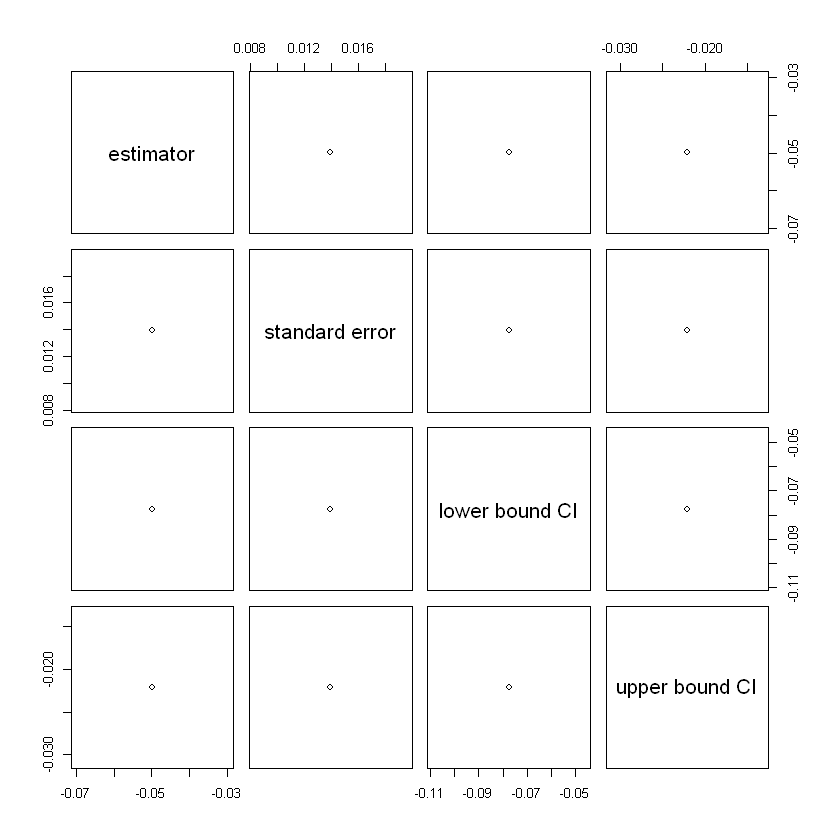

In [110]:
plot(tab)